
#     **Building Model For Character Recognition Using Deep Learning**


######      Student Name --> Priyanshu Goyal

######      Section --> A

######      University Roll No --> 2014787

### **Importing the necessary libraries, packages**

In [1]:
import numpy as np                 # for scientific computation
import pandas as pd                # to manipulate, analyse the dataset
import tensorflow as tf            # to create deep learning models
from tensorflow import keras       # for developing, evaluating models
import matplotlib.pyplot as plt    # for graphical plotting and visualization                                                                     
import seaborn as sb               # for different visualization of the data
from keras.utils import np_utils   # to provide different utilities    

### **Loading the csv digit and letter datasets into dataframes**

In [2]:
#  loading the csv datasets into dataframes
train_digit_data = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")      # training data for digits  
test_digit_data = pd.read_csv("/content/drive/MyDrive/mnist_test.csv")        # testing data for digits
letter_data = pd.read_csv("/content/drive/MyDrive/A_Z Handwritten Data.csv")  # dataset of letters - have to split it 

### **Joining train and test data of digit dataset to get complete digit dataset**

In [3]:
digit_data = pd.concat([train_digit_data, test_digit_data], ignore_index = True)  # this combines digits - train and test data

### **Exploring the digits and letters datasets**

In [4]:
#  seeing the digit dataset
digit_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#  interpretation of above output - we can see that the digit dataset contains 70000 rows and 785 columns
#  means that there are total 70000 instances of images and each image is of a handwritten digit ( from 0 to 9 )
#  785 columns for each row means that 1st column denotes the class/label of the image meaning -
#  - contains the digit no. (0 to 9) of which the image is
#  next 784 columns in each row is the size of each image in pixels --> 28 * 28 pixel image (as 28 * 28 = 784)

In [6]:
#  seeing the letter dataset
letter_data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#  interpretation of above output - we can see that the letters dataset contains 372450 rows and 785 columns
#  means that there are total 372450 instances of images and each image is of a handwritten letter ( from 'A' to 'Z' )
#  785 columns for each row means that 1st column denotes the class/label of the image meaning contains -
#  - the letter no. (0 to 25) of which the image is
#  next 784 columns in each row is the size of each image in pixels --> 28 * 28 pixel image (as 28 * 28 = 784)

In [8]:
#  check the shape of digit and letter dataset
print(f"Digits dataset shape : {digit_data.shape}")
print(f"Letters dataset shape : {letter_data.shape}\n")

Digits dataset shape : (70000, 785)
Letters dataset shape : (372450, 785)



In [9]:
#  above output means that there are total 70000, 372450 examples of images in digit and letter dataset respectively
#  and each image is of a handwritten digit/letter ( from 0 to 9 and from 'A' to 'Z' respectively )
#  785 columns for each row means that 1st column denotes, - 
#  - the class/label of the image meaning contains the digit/letter no. of which the image is
#  next 784 columns in each row is the size of each image in pixels --> 28 * 28 pixel image (as 28 * 28 = 784)
#  and 28*28 means it is a grayscale image i.e. it has no RGB channels otherwise it would have shape 28*28*3

In [10]:
#  show a single example from the digit dataset
print(f"Digit Image Example : \n{digit_data.iloc[0, 1:].values}\n")  # iloc is used for indexing in a dataframe, .values shows the values in form of numpy array
print(f"Digit Label : {digit_data.iloc[0][0]}")  # for printing the label/class of the image

Digit Image Example : 
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247

In [11]:
#  above output shows values of a 28*28 --> 784 pixels image in form of a numpy array and its values are between 0 and 255 
#  also it shows that its corresponding label is 5 --> meaning the image is of digit 5

Text(0.5, 1.0, '\n\nLabel : 5')

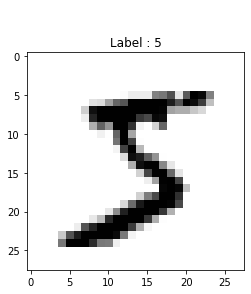

In [12]:
#  plotting the above example from digit dataset with its label

plt.imshow(digit_data.iloc[0, 1:].values.reshape(28, 28), cmap = plt.cm.binary)

#  imshow is used for plotting the image, iloc used for indexing in dataframe
#  reshape changes the flattened(having only one dimension) pixel matrix back into 28*28 image so we can plot and visualize it 
#  cm.binary changes the colour of image to black and white

plt.title(f"\n\nLabel : {digit_data.iloc[0, 0]}")  

#  making the label of image as title
#  0th col contains label for image and plotting the 1st example hence 0th row

Text(0.5, 1.0, '\n\nLabel : 0')

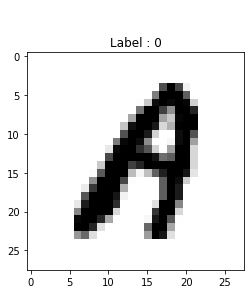

In [13]:
#  plotting an example from the letter dataset

plt.imshow(letter_data.iloc[0, 1:].values.reshape(28, 28), cmap = plt.cm.binary)
plt.title(f"\n\nLabel : {letter_data.iloc[0, 0]}")  

#  making the label of the image as title, using 0th column because it contains the label of the image,
#  and 0th row because of 1st instance

Text(0.5, 1.0, '\n\nLabel : A')

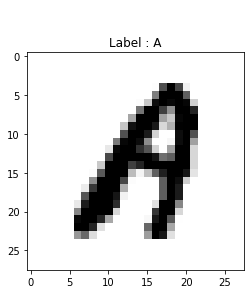

In [14]:
#  above output gives label for 'A' as 0 as labels are in numerical form from 0 to 25 for letters
#  as labels are in numerical form, for printing it in human readable form we add 65 to it (as 65 to 90 in char is 'A' to 'Z')

plt.imshow(letter_data.iloc[0, 1:].values.reshape(28, 28), cmap = plt.cm.binary)
plt.title(f"\n\nLabel : {chr(letter_data.iloc[0, 0] + 65)}")

In [15]:
#  see the counts of each label/class (0 to 9) in the digit dataset, label 0 is for digit 0, 1 for digit 1, ... 9 for digit 9 

print("Counts of labels in the digit dataset\n")
(digit_data['label'].value_counts()).sort_index(inplace = False)  

#  value_counts returns count of unique values, in this case labels
#  using 'label' as it's name of the 0th col which has labels

Counts of labels in the digit dataset



0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: label, dtype: int64

In [16]:
#  check counts of each label/class (0 to 25) in the letter dataset, label 0 is for letter 'A', 1 for letter 'B', ... 25 for letter 'Z' 

print("Counts of labels in the letters dataset\n")
(letter_data['0'].value_counts()).sort_index(inplace = False)  

#  value_counts returns count of unique values, in this case labels, using '0' as 0th col is for labels and its name is '0' in dataset

Counts of labels in the letters dataset



0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: 0, dtype: int64

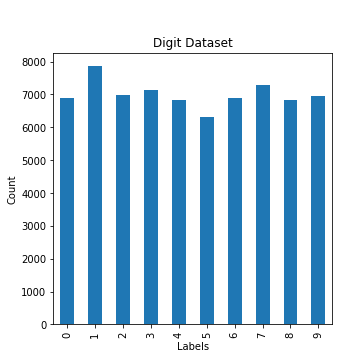

In [17]:
#  visualizing the above count of classes in each dataset using a bar plot for analysis

#  for digit dataset
plt.figure(figsize=(5, 5))  # set figure size
plt.xlabel( 'Labels')  # set x-axis
plt.ylabel('Count')  # set y-axis
plt.title('\n\nDigit Dataset')  # set title
digit_data['label'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # kind of plot is barplot 

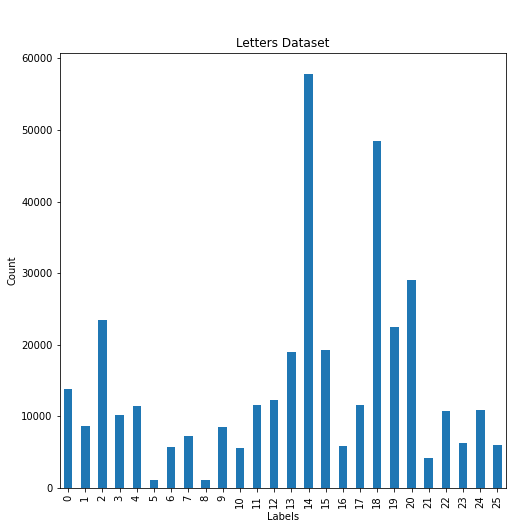

In [18]:
#  for letter dataset
plt.figure(figsize=(8, 8))
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("\n\nLetters Dataset")
letter_data['0'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # makes barplot

In [19]:
#  above barplots show that
#  the classes in digit dataset is balanced
#  but classes in letter dataset is unbalanced --> 
#  images of some letters are very high, and some are low --> this can affect our result badly
#  so we do resampling while preprocessing to handle it

### **Preprocessing the Data**

In [20]:
#  Renaming the 0th column of both dataset to 'label' (for easy understanding) as it contains labels for images

digit_data.rename(columns = {'0' : 'label'}, inplace = True)  # inplace makes cahnges to original dataset
letter_data.rename(columns = {'0' : 'label'}, inplace = True)

In [21]:
#  Resampling the dataset by taking 1000 samples of each class to make the classes balanced

digit_data = digit_data.groupby('label').head(1000)
letter_data = letter_data.groupby('label').head(1000)

In [22]:
#  checking the shape of datasets after resampling

print(f"Digit Data Shape : {digit_data.shape}\n")
print(f"Letter Data Shape : {letter_data.shape}")

Digit Data Shape : (10000, 785)

Letter Data Shape : (26000, 785)


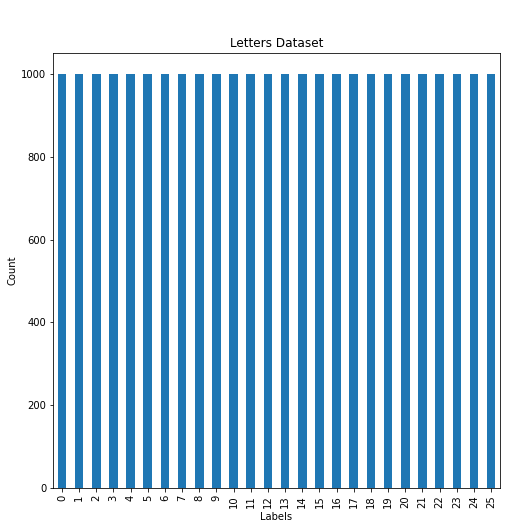

In [23]:
#  again plot bargraphs for datasets to check for balance between classes

#  for letter dataset
plt.figure(figsize=(8, 8))
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("\n\nLetters Dataset")
letter_data['label'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # makes barplot

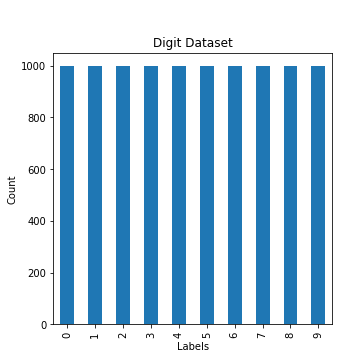

In [24]:
#  for digit dataset
plt.figure(figsize=(5, 5))  # set figure size
plt.xlabel( 'Labels')  # set x-axis
plt.ylabel('Count')  # set y-axis
plt.title('\n\nDigit Dataset')  # set title
digit_data['label'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # kind of plot is barplot 

In [25]:
#  Splitting the datasets into features and Labels for both digits and letters
#  X is for features, y is for labels

#  for digits
X_digit = digit_data.drop('label', axis = 1)    # means take all columns except the first col which contains labels
y_digit = digit_data['label']                     # takes only the 1st col which has labels for images

#  for letters
X_letter = letter_data.drop('label', axis = 1)
y_letter =   letter_data['label']                 # takes only the col of labels

In [26]:
#  now we split the data into training and test data

from sklearn.model_selection import train_test_split  # for splitting data into train and test

#  for digits
X_train_dig, X_test_dig, y_train_dig, y_test_dig = train_test_split(X_digit, y_digit, test_size = 0.2)  # means 20% data goes into testing part, 80% for training

#  for letters
X_train_let, X_test_let, y_train_let, y_test_let = train_test_split(X_letter, y_letter, test_size = 0.2)  # means 20% for test, 80% for training model 

In [27]:
#  we convert dataframe into numpy arrays for easy preprocessing, normalization

#  check type before conversion
print(f"Type before conversion : {type(X_train_dig)}\n")

X_train_dig = X_train_dig.to_numpy()  # to_numpy converts the dataframe into numpy array
X_test_dig = X_test_dig.to_numpy()
X_train_let = X_train_let.to_numpy()
X_test_let = X_test_let.to_numpy()

print(f"Type after conversion : {type(X_train_dig)}\n")

Type before conversion : <class 'pandas.core.frame.DataFrame'>

Type after conversion : <class 'numpy.ndarray'>



In [28]:
#  total we have 36 classes --> 10 for digits, 26 for letters but they are in numerical form in labels
#  so we make a list containing the actual label in a list

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

#  checking total classes
print(f"Total Classes : {len(class_names)}\n")

Total Classes : 36



In [29]:
#  As the labels of letters are from 0 to 25, but total classes are 36, 
#  so we add 10 to labels of letters to make them from 10 to 35 --> 
#  then from 0 to 9 labels are of digits, and from 10 to 35 labels are of letters 

y_train_let = y_train_let + 10
y_test_let = y_test_let + 10

In [30]:
#  till now the labels are in a single array
#  so we convert labels into one-hot encoding which removes the integer encoding 
#  and a new binary variable is added for each unique integer value

from tensorflow.keras.utils import to_categorical  # for converting into categorical data

print(f"shape before one-hot encoding{y_train_dig.shape}\n")

y_train_dig = to_categorical(y_train_dig, num_classes = 36)  # will create 36 columns for each class
y_test_dig = to_categorical(y_test_dig, num_classes = 36)    # and only one column will be true in each row corresponding to the image
y_train_let = to_categorical(y_train_let, num_classes = 36)
y_test_let = to_categorical(y_test_let, num_classes = 36)

print(f"shape after one-hot encoding{y_train_dig.shape}\n")

shape before one-hot encoding(8000,)

shape after one-hot encoding(8000, 36)



In [31]:
#  combining training and testing data from both datasets into a single dataset

X_train = np.concatenate((X_train_dig, X_train_let), axis = 0)  # concatenate merges the datasets which are in form of numpy array 
X_test  = np.concatenate((X_test_dig, X_test_let), axis = 0)
y_train = np.concatenate((y_train_dig, y_train_let), axis = 0)
y_test  = np.concatenate((y_test_dig, y_test_let), axis = 0)

In [32]:
#  normalize the features to reduce complexity of the model 
#  divide by max value of the features numpy array to get normalized data

print(f"before normalizing, max :, min : {X_train[0].max(), X_train[0].min()}\n")

#  as the pixel values are betweem 0 and 255, so max value becomes 255
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"after normalizing, max :, min : {X_train[0].max(), X_train[0].min()}\n")


before normalizing, max :, min : (255, 0)

after normalizing, max :, min : (1.0, 0.0)



### **Plotting some random images from the dataset**

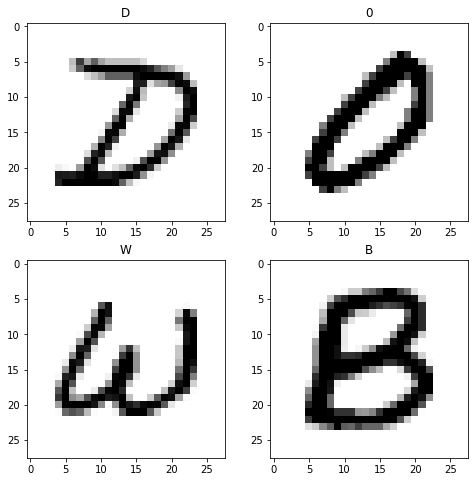

In [33]:
#  plot some random images with labels, from the combined training data of letters and digits
#  same prediction has to be done by model on testing data

import random                                                     # for getting a random value
plt.figure(figsize = (8, 8))                                      # size of the main figure

for i in range(4) :                                               # taking 4 bacause we want to plot 4 random iamges
  
  ind = random.choice(range(len(X_train)))                        # from the length of training data, gives a random integer
  a = plt.subplot(2, 2, i+1)                                      # means 2 rows, 2 columns in the figure and iterate through it 

  plt.imshow(X_train[ind].reshape(28, 28), cmap = plt.cm.binary)  # reshaping(original shape is unchanged) pixel array into 28*28 to plot
  plt.title(class_names[y_train[ind].argmax()])                   # making title of plot as label from the y_train (classes) array

### **Building a simple or fully connected neural network model**

In [34]:
#  check shape of training data which will be given to model
X_train.shape

(28800, 784)

In [35]:
from keras.models import Sequential             #  importing the type of model 
from keras.layers import Input, Dense, Dropout  #  importing the layers to use in model

In [36]:
#  Building a Sequential model --> used to create a linear stack of layers
#  Sequential model is used to create a layer by layer model, output of previous layer is fed to new layer

#  set the random seed for reproducability of results
tf.random.set_seed(42)  #  this helps to produce same results which are randomly generated

#  Define the Seqential model, assigned to a varibale
nn_model_1 = Sequential()   

#  adding layers to the model

#  input layer, shape of training data is (28800, 784)
#  as features are already in a 1d array, we dont need to flatten the input
nn_model_1.add(Input(shape = (784, )))  #  784 means no of features in each input sample/image, it's the col dimension of input matrix

#  adding two dense layers --> deeply connected neural network layer -- they identify features from the input data
nn_model_1.add(Dense(50, activation = "relu"))  #  50 is no of neurons, 'relu' provides non-linearities in the model
nn_model_1.add(Dense(25, activation = "relu"))  #  25 is no of neurons in this hidden layer 

#  output layer
nn_model_1.add(Dense(36, activation = "softmax"))  #  as total classes are 36, also softmax is used for multi-class

In [37]:
#  see the summary of the model

nn_model_1.summary()  #  shows layers in the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 36)                936       
Total params: 41,461
Trainable params: 41,461
Non-trainable params: 0
_________________________________________________________________


In [38]:
#  compile the sequential model

nn_model_1.compile(loss = "categorical_crossentropy", metrics = "accuracy", optimizer = "adam") 

#  as labels are one-hot encoded, loss function is categorical cross entropy for multi-class
#  optimizer is adam for doig optimization -->
#  which changes attributes of neural network to reduce the losses and give most accurate results
#  as no of classes are balanced, so accuracy can be used as an evaluation metric

In [39]:
#  train the model using model.fit() and training data

#  training data is X_train, y_train which contains features/pixels of images and corresponding labels respectively
#  validation_parameter can also be used to give an idea of how model performs on test data during training
#  epochs mean no of times the model will work/pass through the entire training data
#  taking default batch-size of 32
#  batch-size is no of samples from training data which will be worked before updation of internal model parameters

nn_model_1.fit(X_train, y_train, epochs = 25)

Epoch 1/25
900/900 [==============================] - 2s 2ms/step - loss: 1.3554 - accuracy: 0.6372
Epoch 2/25
900/900 [==============================] - 1s 2ms/step - loss: 0.6468 - accuracy: 0.8210
Epoch 3/25
900/900 [==============================] - 1s 2ms/step - loss: 0.5183 - accuracy: 0.8543
Epoch 4/25
900/900 [==============================] - 1s 2ms/step - loss: 0.4462 - accuracy: 0.8725
Epoch 5/25
900/900 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8849
Epoch 6/25
900/900 [==============================] - 1s 2ms/step - loss: 0.3587 - accuracy: 0.8969
Epoch 7/25
900/900 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.9026
Epoch 8/25
900/900 [==============================] - 1s 2ms/step - loss: 0.3066 - accuracy: 0.9111
Epoch 9/25
900/900 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.9165
Epoch 10/25
900/900 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.9186

In [40]:
#  Evaluate the model on the test data (X_test, y_test)

#  model will run on test data and predict classes of test data and prediction will be matched with y_test to give accuracy
test_model = nn_model_1.evaluate(X_test, y_test)
print(f"\nNeural Network Model 1, Accuracy  : {test_model[1]} \n")
print(f"Neural Network Model 1, Loss  : {test_model[0]} \n")

225/225 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8882

Neural Network Model 1, Accuracy  : 0.8881944417953491 

Neural Network Model 1, Loss  : 0.42728739976882935 



### **Improving the simple neural network model**

In [41]:
#  to improve accuracy of the above model, we add more dense layers and train for longer 
#  also can add dropout layer to prevent overfitting

#  set the random seed for reproducability of results
tf.random.set_seed(42)

#  Define the Seqential model - linear stack of layers
nn_model_2 = Sequential()   

#  input layer, shape of training data is (28800, 784)
nn_model_2.add(Input(shape = (784, )))  #  784 means no of features in each input sample/image

#  adding 4 dense layers with dropout layer to avoid overfitting
nn_model_2.add(Dense(100, activation = "relu"))  #  'relu' provides non-linearities in the model
nn_model_2.add(Dense(75, activation = "relu"))

nn_model_2.add(Dropout(0.1))                     #  to prevent from overfitting 
#  specifies proportion of neurons in preceding dense layer that should take 0 value, 0.1 means 10% neurons

nn_model_2.add(Dense(50, activation = "relu"))
nn_model_2.add(Dense(25, activation = "relu"))

#  output layer
nn_model_2.add(Dense(36, activation = "softmax"))  #  as total classes are 36, also softmax is used for multi-class

In [42]:
#  see the summmary of the model

nn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 36)                936       
Total params: 92,086
Trainable params: 92,086
Non-trainable params: 0
__________________________________________________

In [43]:
#  compile the model

nn_model_2.compile(loss = "categorical_crossentropy", metrics = "accuracy", optimizer = "adam")

In [44]:
#  training the model, this time we increase the no of epochs
#  also validation parameter is used to see how model performs on test data while training
#  we also save training history in a varibale for each epoch which can be used to create plots or learning curves for model

hist = nn_model_2.fit(X_train, y_train, epochs = 40, validation_data  = (X_test, y_test))

Epoch 1/40
900/900 [==============================] - 3s 3ms/step - loss: 1.3610 - accuracy: 0.6197 - val_loss: 0.6415 - val_accuracy: 0.8167
Epoch 2/40
900/900 [==============================] - 2s 2ms/step - loss: 0.5771 - accuracy: 0.8310 - val_loss: 0.4412 - val_accuracy: 0.8703
Epoch 3/40
900/900 [==============================] - 2s 2ms/step - loss: 0.4267 - accuracy: 0.8720 - val_loss: 0.3862 - val_accuracy: 0.8849
Epoch 4/40
900/900 [==============================] - 2s 2ms/step - loss: 0.3493 - accuracy: 0.8940 - val_loss: 0.3683 - val_accuracy: 0.8965
Epoch 5/40
900/900 [==============================] - 2s 2ms/step - loss: 0.3022 - accuracy: 0.9085 - val_loss: 0.3265 - val_accuracy: 0.9029
Epoch 6/40
900/900 [==============================] - 2s 2ms/step - loss: 0.2680 - accuracy: 0.9150 - val_loss: 0.3393 - val_accuracy: 0.8997
Epoch 7/40
900/900 [==============================] - 2s 2ms/step - loss: 0.2365 - accuracy: 0.9253 - val_loss: 0.3156 - val_accuracy: 0.9072
Epoch 

In [45]:
#  performance of model on test data

test = nn_model_2.evaluate(X_test, y_test)
print(f"\nNeural Network Model 2, Accuracy  : {test[1]} \n")
print(f"Neural Network Model 2, Loss  : {test[0]} \n")

225/225 [==============================] - 0s 1ms/step - loss: 0.4110 - accuracy: 0.9222

Neural Network Model 2, Accuracy  : 0.9222221970558167 

Neural Network Model 2, Loss  : 0.41103631258010864 



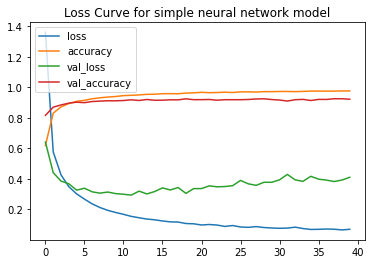

In [46]:
#  Plot the loss curves or training history for the above model using the saved history

import pandas as pd
pd.DataFrame(hist.history).plot(title="Loss Curve for simple neural network model");  #  can access info in hist variable using history attribute

### **Making predictions with simple neural network model**

In [47]:
#  assign the best neural network model to a new varibale
nn_model = nn_model_2

#  we make predictions on the test data(X_test) using .predict() method
#  model outputs a list of prediction probabilities,
#  meaning a no. for how likely it thinks a part. class is to be the label

nn_y_pred_prob = nn_model.predict(X_test)  #  storing prediction probabilities in y_pred_prob varibale
nn_y_pred_prob[0]  #  see the first prediction probability --> probability for each class

array([1.9480401e-16, 8.7733383e-25, 1.0000000e+00, 3.9309434e-11,
       6.7007737e-20, 2.0155357e-24, 6.0394310e-14, 6.5208344e-14,
       6.4307771e-15, 2.4801577e-21, 4.9940570e-17, 7.7346990e-20,
       7.0755431e-26, 4.1253637e-19, 4.4448643e-29, 5.3822209e-31,
       8.6516643e-25, 9.7722614e-24, 1.0281032e-34, 4.3783404e-14,
       8.5873701e-28, 3.2075829e-34, 8.6307759e-30, 3.0355853e-24,
       5.5885331e-18, 4.7877881e-19, 1.2696810e-15, 1.1848244e-21,
       6.2796059e-22, 1.8762370e-31, 7.1142150e-27, 0.0000000e+00,
       6.1037915e-38, 1.2005423e-38, 1.9347216e-34, 2.6791261e-19],
      dtype=float32)

In [48]:
#  convert the prediction probability to predictions by getting the highest probablity from each prediction prob.

nn_y_pred = nn_y_pred_prob.argmax(axis = 1)

#  display predictions, actual classes
print(f"First 10 prediction classes : {nn_y_pred[:10]}\n")
print(f"First 10 actual classes     : {(y_test[:10]).argmax(axis = 1)}\n") 

First 10 prediction classes : [2 3 0 7 2 3 6 9 3 4]

First 10 actual classes     : [2 3 0 7 2 3 0 9 3 4]



### **Making confusion matrix for simple neural network model**

In [49]:
from sklearn.metrics import confusion_matrix  #  inbuilt module for making confusion matrix

#  confusion matrix compares true lables with predicted labels, 
#  also indicates that how much a particular class is confused with other classes 

#  as true labels(y_test) are one-hot encoded we take max from all columns of a row,
#  which gives class of that particular image, using argmax()

y_true = y_test.argmax(axis = 1)
np.set_printoptions(threshold = np.inf)                 #  for printing the full confusion matrix
confusion_matrix(y_true = y_true, y_pred = nn_y_pred)   #  y_true is actual labels, y_pred is predicted labels

#  when two images have a similar shape, then predictions get mixed up

array([[169,   0,   0,   0,   0,   1,   3,   1,   0,   0,   0,   0,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 170,   1,   0,   0,   0,   0,   1,   0,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2, 158,   1,   1,   0,   0,   6,   2,   1,   0,   0,   0,
          3,   0,   0,   0,   0,   0,   2,   0,   1,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,  12],
       [  1,   1,   2, 189,   0,   1,   0,   2,   3,   5,   0,   4,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0, 197,   0,   0,   0,   1,   3,   1,   0,   0,
          0,   0,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,  

Text(0.5, 1.0, '\nTrue Character : J, Predicted Character : J')

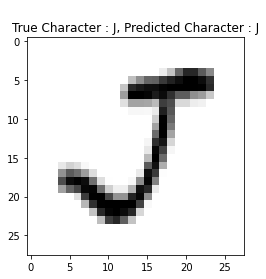

In [50]:
#  plot a random image with its prediction, and compare true with predicted labels

import random                         #  module for generating random numbers 
i = random.randint(0, len(X_test))    #  gives random integer from range of test data

img = X_test[i]                                        #  random image features stored in img variable
pred_prob = nn_model.predict(img.reshape(1, 784))      #  have to reshape the image to get into right size for model, 1 means 1 image is passed
char_pred = class_names[pred_prob.argmax()]            #  getting predicted character of the image
char_true = class_names[y_test[i].argmax()]            #  storing true character  
plt.imshow(img.reshape(28, 28), cmap = plt.cm.binary)  #  plot the random image
plt.title(f"\nTrue Character : {char_true}, Predicted Character : {char_pred}")  #  title of the plot

In [51]:
#  save the simple (fully connected) neural network model using .save() method

nn_model.save("nn_model.h5")

### **Building a convolutional neural network model**

In [55]:
#  check shape of input data (X_train)
X_train.shape

(28800, 784)

In [56]:
#  reshape the input to suit cnn model input and store in new variable
#  cnn can deal with image data in 2D, this helps to retain spatial features of images
#  input of cnn needs image data, so we reshape single vector of image features into 3 dimension matrix

X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)  #  will reshape flattened array of image pixels to 28*28 matrix 
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)     #  1 means image has 1 channel i.e gray-scale image

In [57]:
#  import necessary libraries for building model

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input  #  layers imported for cnn model
from keras.models import Sequential  #  Sequential is type of model

In [58]:
#  set the random seed for reproducability of results
tf.random.set_seed(42)

#  we build a sequential model --> which is a linear stack of layers


#  define the model
cnn_model_1 = Sequential()

#  add layers to model

#  Input Layer of model, takes image data in 3 dimension shape,
#  28*28 is pixel matrix, and 1 is for channel(black-white image has 1 channel)
cnn_model_1.add(Input(shape = (28, 28, 1)))

#  adding convo layer --> extracts features from the image, relu makes all -ve values to 0
#  32 is the no of filters, that conv layer will learn from and also output filter of the convolution layer 
cnn_model_1.add(Conv2D(32, kernel_size = (3, 3), activation = "relu"))  # (3, 3) is the filter matrix, moves through the image

#  add dropout layer to avoid overfitting
cnn_model_1.add(Dropout(0.1))

#  flatten output of conv layer (which generates 3D activation maps) to feed into fully connected output layer
cnn_model_1.add(Flatten())

#  Fully connected layer with 250 neurons, relu for non-linearities
cnn_model_1.add(Dense(250, activation = "relu"))

#  output layer is a fully connected layer, as total classes are 36, so 1 for each class, softmax for multi class
cnn_model_1.add(Dense(36, activation = "softmax"))

In [59]:
#  see the summary of the model, input and output of layers

cnn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 250)               5408250   
_________________________________________________________________
dense_9 (Dense)              (None, 36)                9036      
Total params: 5,417,606
Trainable params: 5,417,606
Non-trainable params: 0
_________________________________________________________________


In [60]:
#  compile the model, define the metrics, loss function

cnn_model_1.compile(metrics = "accuracy", loss = "categorical_crossentropy", optimizer = "adam")

#  as labels are one-hot encoded, loss function is categorical cross entropy for multi-class
#  optimizer is adam - changes attributes of neural network to reduce the losses
#  as no of classes are balanced, so accuracy can be used for evaluation metric

In [61]:
#  train the cnn model using model.fit() and training data

cnn_model_1.fit(X_train_cnn, y_train, epochs = 20, validation_data = (X_test_cnn, y_test))

#  epochs mean no of times the model will work/pass through the entire training data
#  validation_parameter is used to indicate how model performs on test data during training

Epoch 1/20
900/900 [==============================] - 60s 66ms/step - loss: 0.5667 - accuracy: 0.8383 - val_loss: 0.2656 - val_accuracy: 0.9187
Epoch 2/20
900/900 [==============================] - 59s 66ms/step - loss: 0.1826 - accuracy: 0.9442 - val_loss: 0.2154 - val_accuracy: 0.9360
Epoch 3/20
900/900 [==============================] - 59s 66ms/step - loss: 0.0982 - accuracy: 0.9676 - val_loss: 0.2059 - val_accuracy: 0.9404
Epoch 4/20
900/900 [==============================] - 59s 66ms/step - loss: 0.0641 - accuracy: 0.9781 - val_loss: 0.2337 - val_accuracy: 0.9375
Epoch 5/20
900/900 [==============================] - 60s 66ms/step - loss: 0.0459 - accuracy: 0.9843 - val_loss: 0.2484 - val_accuracy: 0.9344
Epoch 6/20
900/900 [==============================] - 59s 66ms/step - loss: 0.0367 - accuracy: 0.9873 - val_loss: 0.2473 - val_accuracy: 0.9400
Epoch 7/20
900/900 [==============================] - 59s 66ms/step - loss: 0.0323 - accuracy: 0.9884 - val_loss: 0.2500 - val_accuracy:

In [62]:
#  Evaluate the model on the test data (X_test_cnn, y_test)

#  predictions of the model will be matched with y_test to give accuracy
testing_model = cnn_model_1.evaluate(X_test_cnn, y_test)
print(f"\nCNN Model 1, Accuracy : {testing_model[1]} \n")
print(f"CNN Model 1, Loss       : {testing_model[0]} \n")

225/225 [==============================] - 3s 12ms/step - loss: 0.3467 - accuracy: 0.9449

CNN Model 1, Accuracy : 0.944861114025116 

CNN Model 1, Loss       : 0.34665927290916443 



### **Improving the Convolutional Neural Network Model**

In [63]:
#  the above cnn model gives 94.4% accuracy on test data, so we try to improve it 
#  by adding more convolutional layers, pooling layer

In [68]:
#  Set the random seed to reproduce the results again
tf.random.set_seed(42)  

#  define the model

#  Creating Sequential model which is a linear stack of layers
cnn_model_2 = Sequential()

#  add layers --> here we use 2 Conv layers and also a pooling layer

#  Input layer
cnn_model_2.add(Input(shape = (28, 28, 1)))

#  convolution or feature extract layers with weight/filter matrix of 3*3 
cnn_model_2.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
cnn_model_2.add(Conv2D(32, kernel_size = (3, 3), activation = "relu"))

#  pooling layer --> reduces output from conv layers to reduce parameters
#  2,2 means it selects largest element from 2x2 matrix in the output matrix of Conv. layer
cnn_model_2.add(MaxPooling2D(pool_size = (2, 2)))   

#  dropout layer to avoid overfitting
cnn_model_2.add(Dropout(0.3))

#  flattening output of conv layer to provide to output layer
cnn_model_2.add(Flatten())

#  Dense layer
cnn_model_2.add(Dense(252, activation = "sigmoid"))

#  fully connected output layer to transform output into the total no of classes (36) 
cnn_model_2.add(Dense(36, activation = "softmax"))

In [69]:
#  see the summary of the model
cnn_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 252)               1161468   
_________________________________________________________________
dense_13 (Dense)             (None, 36)               

In [70]:
#  compiling the model, using accuracy as evaluation metrics, 
#  as labels are one-hot encoded so loss function is categorical_crossentropy

cnn_model_2.compile(metrics = "accuracy", loss = "categorical_crossentropy", optimizer = "adam")

In [71]:
#  train the model on X_train_cnn (training data of the characters reshaped for cnn model)
#  here we run through training data for 15 times (called epoch) which gives best test accuracy
#  saving train history in a varibale for each epoch which can be used to create learning curves for model  

history_inf = cnn_model_2.fit(X_train_cnn, y_train, epochs = 15, validation_data = (X_test_cnn, y_test))

Epoch 1/15
900/900 [==============================] - 85s 94ms/step - loss: 0.7119 - accuracy: 0.8219 - val_loss: 0.2872 - val_accuracy: 0.9201
Epoch 2/15
900/900 [==============================] - 84s 93ms/step - loss: 0.2489 - accuracy: 0.9315 - val_loss: 0.2055 - val_accuracy: 0.9371
Epoch 3/15
900/900 [==============================] - 84s 93ms/step - loss: 0.1699 - accuracy: 0.9523 - val_loss: 0.1734 - val_accuracy: 0.9478
Epoch 4/15
900/900 [==============================] - 84s 93ms/step - loss: 0.1298 - accuracy: 0.9637 - val_loss: 0.1645 - val_accuracy: 0.9492
Epoch 5/15
900/900 [==============================] - 84s 93ms/step - loss: 0.1018 - accuracy: 0.9708 - val_loss: 0.1520 - val_accuracy: 0.9533
Epoch 6/15
900/900 [==============================] - 84s 93ms/step - loss: 0.0830 - accuracy: 0.9747 - val_loss: 0.1508 - val_accuracy: 0.9531
Epoch 7/15
900/900 [==============================] - 84s 93ms/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.1422 - val_accuracy:

In [72]:
#  calculate accuracy of the model on test data(X_test_cnn, y_test)

testing_val = cnn_model_2.evaluate(X_test_cnn, y_test)

print(f"\nCNN Model 2, Accuracy : {testing_val[1]} \n")
print(f"CNN Model 2, Loss       : {testing_val[0]} \n")

225/225 [==============================] - 5s 21ms/step - loss: 0.1299 - accuracy: 0.9640

CNN Model 2, Accuracy : 0.9640277624130249 

CNN Model 2, Loss       : 0.12989218533039093 



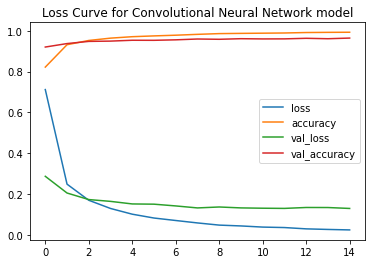

In [73]:
#  Plotting the loss curves for the above model using the saved history while training

import pandas as pd
pd.DataFrame(history_inf.history).plot(title="Loss Curve for Convolutional Neural Network model");  
#  can access info in hist variable using history attribute

### **Making Predictions with the CNN Model**

In [74]:
#  assign the best convolutional neural network model to a new varibale
cnn_model = cnn_model_2

#  make predictions on the test data(X_test_cnn) using .predict() method
#  model gives prediction probabilities (no between 0 and 1 for each class)

cnn_y_pred_prob = cnn_model.predict(X_test_cnn)  #  prediction probabilities
cnn_y_pred_prob[0]                               #  see the first prediction probability

array([2.48347496e-05, 6.30586158e-07, 9.99211669e-01, 6.02660293e-04,
       7.18958336e-06, 1.38934774e-06, 1.02918726e-04, 1.19021957e-08,
       8.04851970e-06, 6.39231303e-07, 2.71662043e-06, 1.15931407e-05,
       5.23574795e-10, 1.02180380e-07, 1.90696756e-08, 6.55485666e-11,
       2.06479854e-06, 1.74679662e-05, 2.11988441e-10, 2.89137779e-06,
       1.53218965e-11, 2.67482675e-10, 4.78197659e-09, 3.39805073e-09,
       1.06485516e-07, 1.29174839e-06, 7.68619373e-08, 1.94901361e-07,
       6.00853980e-07, 4.36825619e-12, 3.23139138e-09, 1.80053247e-11,
       7.33440908e-09, 1.32648426e-09, 1.28320856e-08, 8.29750377e-07],
      dtype=float32)

In [75]:
#  convert the prediction probability to predictions by getting the highest probablity from each prediction prob.

cnn_y_pred = cnn_y_pred_prob.argmax(axis = 1)

#  display predicted classes, actual classes
print(f"First 10 prediction classes : {cnn_y_pred[:10]}\n") 
print(f"First 10 actual classes     : {(y_test[:10]).argmax(axis = 1)}\n")

First 10 prediction classes : [2 3 0 7 2 3 0 9 3 4]

First 10 actual classes     : [2 3 0 7 2 3 0 9 3 4]



### **Confusion Matrix for the CNN Model**

In [76]:
from sklearn.metrics import confusion_matrix  #  module for making confusion matrix

#  confusion matrix indicates how much a particular class is confused with other classes 

#  as true labels(y_test) are one-hot encoded,
#  to get the label in a 1D array we take max from all columns of a row in y_test using argmax()

y_true = y_test.argmax(axis = 1)
np.set_printoptions(threshold = np.inf)                  #  for printing the full confusion matrix
confusion_matrix(y_true = y_true, y_pred = cnn_y_pred)   #  y_pred means predicted labels, y_true means actual labels


array([[168,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,  34,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 172,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2, 170,   1,   0,   0,   0,   3,   2,   0,   0,   0,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   9],
       [  0,   0,   2, 203,   0,   1,   0,   1,   1,   1,   0,   2,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 198,   0,   1,   0,   1,   2,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,  

Text(0.5, 1.0, '\nTrue Character : B, Predicted Character : B')

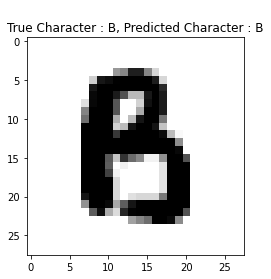

In [77]:
#  plot a random image with its prediction using the CNN model

import random                             #  module for generating random numbers 
i = random.randint(0, len(X_test_cnn))    #  gives random integer from range of test data

image = X_test_cnn[i]                     #  random image features stored in image variable

#  have to reshape the image to get into right size for model,
#  1 at start means 1 image is passed, (28,28,1) means 28*28 image with 1 channel(black-white image)
pred_prob = cnn_model.predict(image.reshape(1, 28, 28, 1))

ch_pred = class_names[pred_prob.argmax()]            #  getting predicted character of the image
ch_true = class_names[y_test[i].argmax()]            #  storing true character  
plt.imshow(image.reshape(28, 28), cmap = plt.cm.binary)                      #  plot the random image
plt.title(f"\nTrue Character : {ch_true}, Predicted Character : {ch_pred}")  #  title of the plot

### **Saving the Convolutional Neural Network Model**

In [78]:
#  Save the model using .save()
cnn_model.save("cnn_model")

INFO:tensorflow:Assets written to: cnn_model/assets
